Python for Bioinformatics, Practical Classes 2

<h3> Lambda+map/filter 

<h4> Exercise1: Let's define a list of sequences ["ATGGGG", "AAATT", "GGGATAGAGA", "GAGAT"] and in the next step create  a new list which elements are lengths for each sequence -> [6, 5, 10, 5].

In [ ]:
# exercise 1

x = ["ATGGGG", "AAATT", "GGGATAGAGA", "GAGAT"]

y = list(map(lambda a: len(a),x))  #apply lambda expression for every element in x
print(y)

[6, 5, 10, 5]


<h4> Exercise2: Let's define a list of sequences ["ATGGGG", "AAATT", "GGGATAGAGA", "GAGAT"] and in the next step create  a new list which contains only these sequences which starts with "G" -> ["GGGATAGAGA", "GAGAT"].

In [ ]:
# exercise 2

x = ["ATGGGG", "AAATT", "GGGATAGAGA", "GAGAT"]

y = list(filter(lambda a: a[0] == 'G',x))  #apply lambda expression for every element in x
print(y)

['GGGATAGAGA', 'GAGAT']


<h3> FASTA files processing

<h4> Example: Printing headings from a file containing sequences in FASTA format.

In [ ]:
with open('sequences', 'r') as f:
    for line in f:  #for every line in sequences file
        line = line.rstrip() #The rstrip() method removes characters at the end a string (including "\n")
        if line.startswith('>'):
            print(line)

>s1
>s2
>s3


In [ ]:
f = open("sequences", "r")
for line in f:
    print(line)

>s1

ATGCGCG

>s2

TATCGGCG

>s3

CCCCCCCCCC


<h4> Exercise3: Open a file 'sequneces' and save sequences into the dictionary variable Seq.

 <br>
 
Remark: You may start with creating two lists containing headings and sequences and in the next step convert them into a dictionary.

In [ ]:
# exercise 3

headings = []
sequences = []

with open('sequences', 'r') as f:
    for line in f:  #for every line in sequences file
        line = line.rstrip() #The rstrip() method removes characters at the end a string (including "\n")
        if line.startswith('>'):
            headings.append(line)
        else:
            sequences.append(line)

res = dict(zip(headings, sequences))

res

{'>s1': 'ATGCGCG', '>s2': 'TATCGGCG', '>s3': 'CCCCCCCCCC'}

<h3> Searching the set of Sequences

In the next three exercises, we will be searching a text file containing sequences.

<h4> Exercise4: Consider the following nucleotide sequence:

<h4> File "database_n" contains 100 nucleotide sequences. 
<br>
    
Make an alignment between every subsequent sequence in the file and the query (assume the following system points: match:1, mismatch:-3, insert=1, extend=1). 
    
- Which sequences are the most similar to the query? You may plot the distributions of scores using plt.hist(data) method.

In [19]:
# exercise 4

from pc1 import DNA_2, SequenceAlign
import matplotlib.pyplot as plt

query = "ATGCAACATATGCGACAAATGCTATTCTTATTATATTCGGATTC"

headings = []
sequences = []

scores_n = []
indexes = []
count = 0

with open('database_n', 'r') as f:
    for line in f:  #for every line in sequences file
        line = line.rstrip() 
        if line.startswith('>'):
            headings.append(line)
        else:
            sequences.append(line)

n_dict = dict(zip(headings, sequences))

for idx in n_dict:
    seq = n_dict[idx]

    score, align_a, align_b = SequenceAlign(query, seq, similarityMatrix=DNA_2, insert=1, extend=1)

    scores_n.append(score)
    indexes.append(count)
    count+=1

ModuleNotFoundError: No module named 'practical1'

(array([ 6., 39., 37., 14.,  1.,  0.,  0.,  0.,  0.,  3.]),
 array([-17. , -11.4,  -5.8,  -0.2,   5.4,  11. ,  16.6,  22.2,  27.8,
         33.4,  39. ]),
 <BarContainer object of 10 artists>)

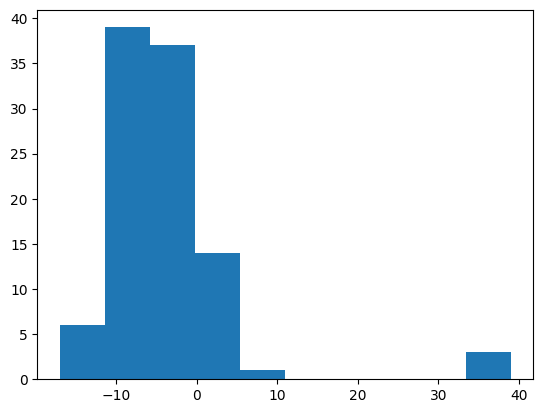

In [ ]:
plt.hist(scores_n)

# 3 sequences have scores between 30-40

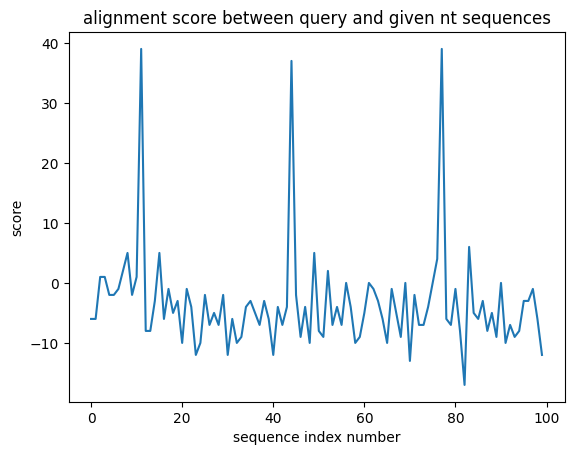

In [ ]:
plt.plot(indexes, scores_n)
plt.title('alignment score between query and given nt sequences')
plt.xlabel('sequence index number')
plt.ylabel('score')
plt.show()

In [ ]:
import numpy as np
from scipy import stats

ind = np.argpartition(scores_n, -3)[-3:]

ind

# ind = [44, 11, 77]
# query is more similar to these sequences

array([44, 11, 77])

<h4> Exercise5: Consider the following protein sequence:

<h4> File "database_p" contains 100 protein sequences. 
<br>
    

    
Using k-mers with k=3, compare every sequence in the file and the query (you may use k_comparison method from the lecture2). 
    
- Which sequences are the most similar to the query? You may plot the distributions of distances using plt.hist(data) method. 

- What are the advantages and disadvatages of such an approach comparing to the alignment approach?  
    
- In the nucleotide case, the $k$ parameter should be bigger or smaller? Why?

In [31]:
#k-mers 
def kmers(seq, k = 3):
    d = {}
    N = len(seq)
    for i in range(N-k+1):
        mer = seq[i:(i+k)]
        if mer not in d.keys():
            d[mer] = 1
        else:
            d[mer] += 1
            
    return d

#k-comparison
def k_comparison(seq1, seq2, k=3):
    d1 = kmers(seq1, k)
    d2 = kmers(seq2, k)
    keysd1 = list(d1.keys())
    keysd2 = list(d2.keys())
    unique_mers = list(set(keysd1+keysd2))
    c1 = []
    c2 = []
    for elem in unique_mers:
        if elem in d1.keys():
            c1.append(d1[elem])
        else:
            c1.append(0)
            
    for elem in unique_mers:
        if elem in d2.keys():
            c2.append(d2[elem])
        else:
            c2.append(0)

    distance = 0

    for i in range(len(c1)):
        distance += (c1[i]-c2[i])**2
        
    return round(distance**0.5,2)

In [ ]:
# exercise 5

def kmer_score_p(n_mers):
    query = "EKPDPHTKMHQYWLKPYELMEIYYQYRPFINFDQQMRVGLRCEA"

    headings = []
    sequences = []

    scores_p = []

    with open('database_p', 'r') as f:
        for line in f:  #for every line in sequences file
            line = line.rstrip() 
            if line.startswith('>'):
                headings.append(line)
            else:
                sequences.append(line)

    p_dict = dict(zip(headings, sequences))

    for idx in p_dict:
        seq = p_dict[idx]

        score = k_comparison(seq, query, n_mers)

        scores_p.append(score)
    
    return scores_p

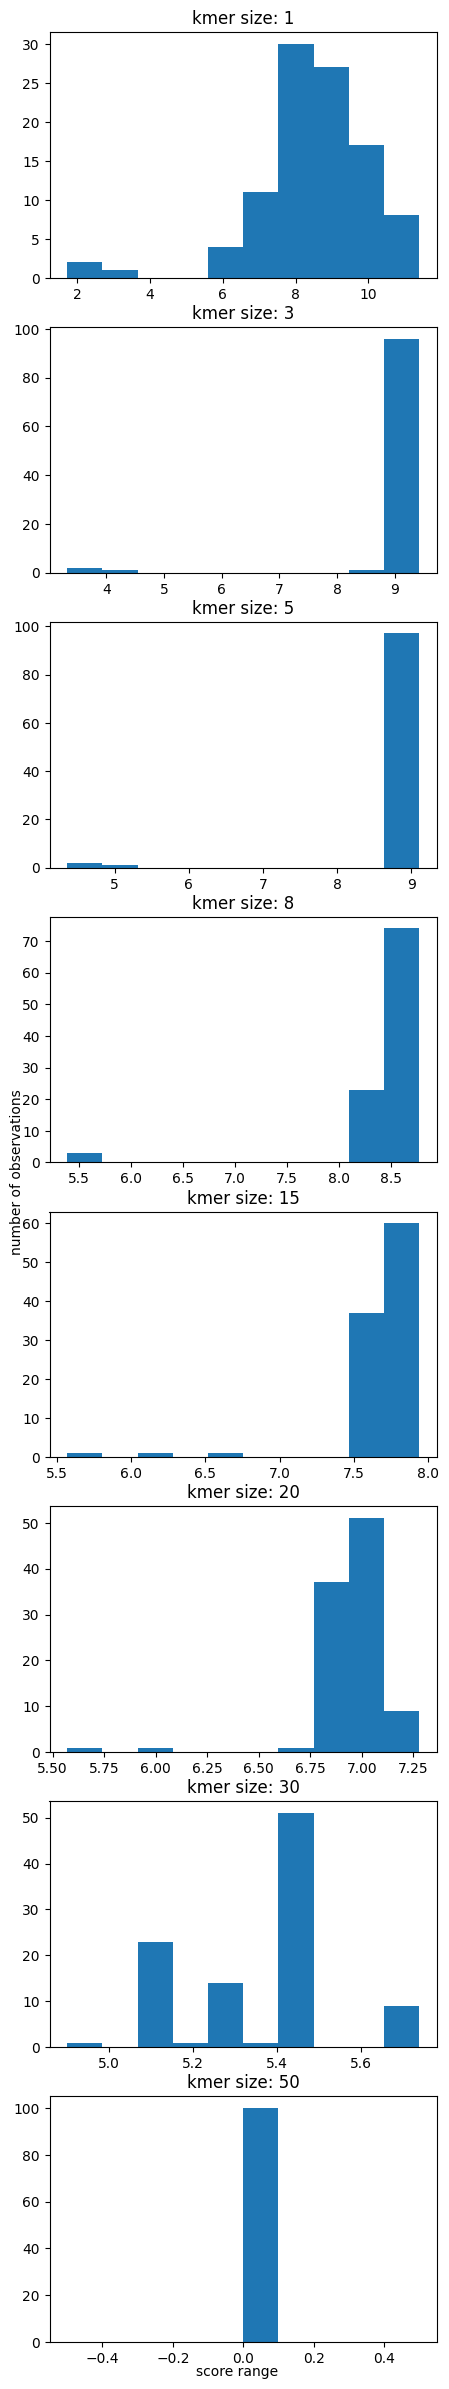

In [ ]:
k_list = [1, 3, 5, 8, 15, 20, 30, 50]

fig, axis = plt.subplots(8, 1, figsize=(5, 30))

fig.text(0.5, 0.1, 'score range', ha='center', va='center')
fig.text(0.06, 0.5, 'number of observations', ha='center', va='center', rotation='vertical')

for i in range(len(k_list)):  

    scores = kmer_score_p(k_list[i])

    axis[i].hist(scores)
    axis[i].set_title("kmer size: "+ str(k_list[i]))

# According to the following graphs, a k-value around 20 generates a good result
# k=1 also generates a result that looks good but I believe it's not right

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  1., 37., 51.,  9.]),
 array([5.57 , 5.741, 5.912, 6.083, 6.254, 6.425, 6.596, 6.767, 6.938,
        7.109, 7.28 ]),
 <BarContainer object of 10 artists>)

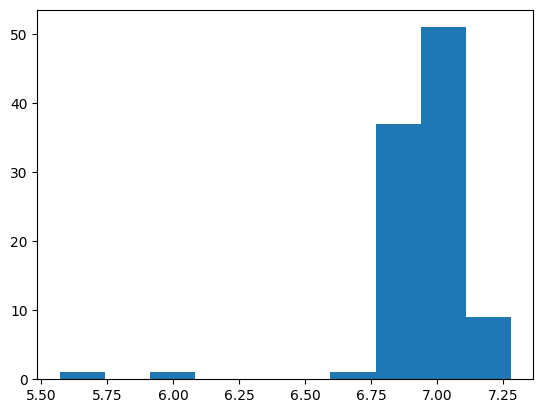

In [ ]:
scores_p = kmer_score_p(20)

plt.hist(scores_p)

# 9 sequences have scores between 7.109 and 7.28

In [ ]:
ind = np.argpartition(scores_p, -9)[-9:]

ind

# ind = [34, 55, 45, 32, 15, 76, 74, 70, 49]
# query is more similar to these sequences

array([34, 55, 45, 32, 15, 76, 74, 70, 49])

Advantages of kmer method: require less computational power, doesn't require gap scores for penalties, thresholds and so on which if assumed wrong can influence the results.
Disavantages: finding out the best k-value

In [ ]:
# exercise 5 with nucleotides

def kmer_score_n(n_mers):
    query = "ATGCAACATATGCGACAAATGCTATTCTTATTATATTCGGATTC"

    headings = []
    sequences = []

    scores_n = []

    with open('database_n', 'r') as f:
        for line in f:  #for every line in sequences file
            line = line.rstrip() 
            if line.startswith('>'):
                headings.append(line)
            else:
                sequences.append(line)

    p_dict = dict(zip(headings, sequences))

    for idx in p_dict:
        seq = n_dict[idx]

        score = k_comparison(seq, query, n_mers)

        scores_n.append(score)
    
    return scores_n

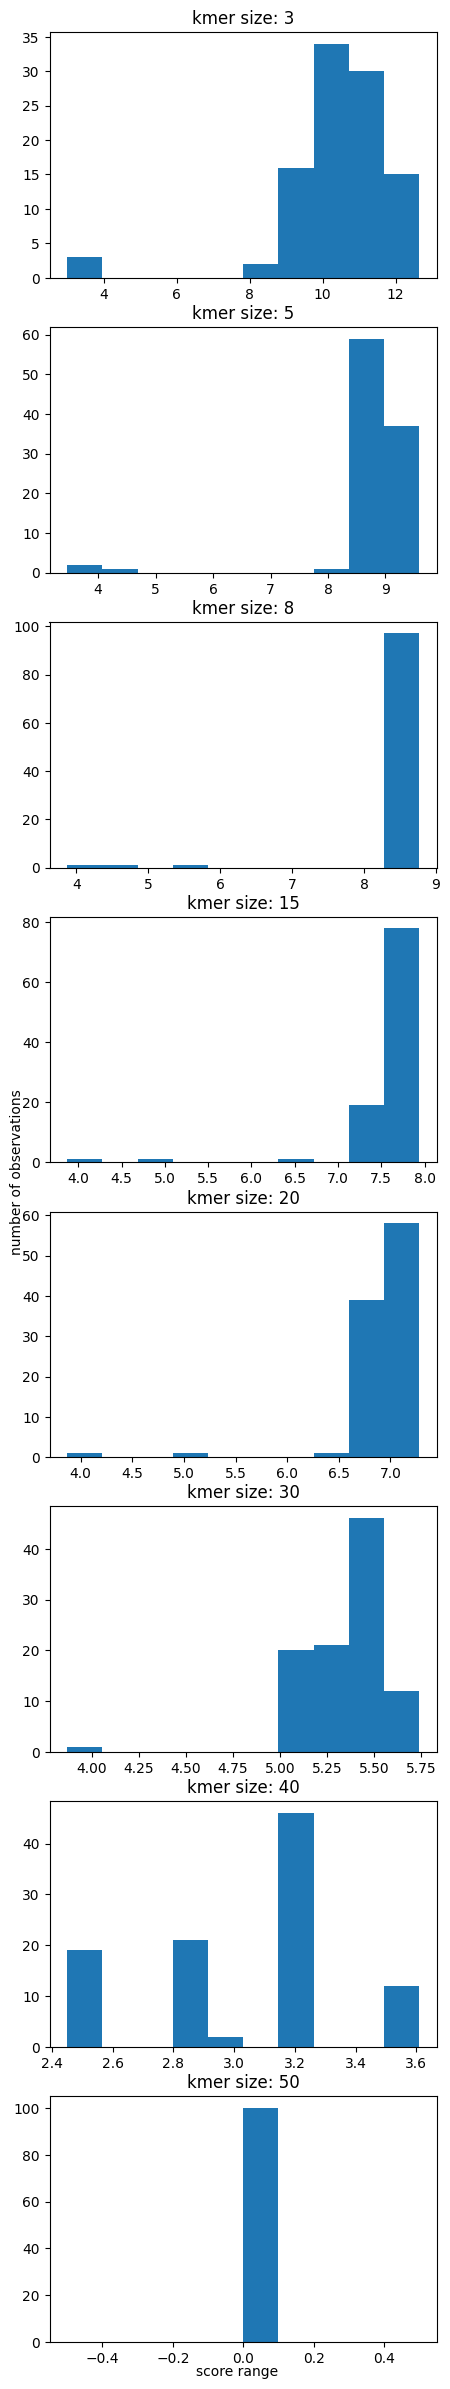

In [ ]:
# exercise 5 - with nucleotides - analysis

k_list = [3, 5, 8, 15, 20, 30, 40, 50]

fig, axis = plt.subplots(8, 1, figsize=(5, 30))

fig.text(0.5, 0.1, 'score range', ha='center', va='center')
fig.text(0.06, 0.5, 'number of observations', ha='center', va='center', rotation='vertical')

for i in range(len(k_list)):  

    scores = kmer_score_n(k_list[i])

    axis[i].hist(scores)
    axis[i].set_title("kmer size: "+ str(k_list[i]))

# I believe k around 30-4- works better so 
# the k-value has to be higher but not very high

<h4> Exercise6: Consider the following protein subsequence:

<h4> File "database_p2" contains 100 longer protein sequences. 

<h4> Using k-mers with k=3 compare every sequence in the file and the query - check which k-mers that are present in the query are present in the sequences from the file. As a result, for the comparison between two sequences you obtain the total number of k-mers shared between sequences (so if k-mer is present add 1).
    
<br>
    
    
- Which sequences are the query sequence possibly derived from? Localize the query fragments.
- Look at these sequences and make a comment on it.

In [ ]:
#k-mers 
def kmers(seq, k = 3):
    d = {}
    N = len(seq)
    for i in range(N-k+1):
        mer = seq[i:(i+k)]
        if mer not in d.keys():
            d[mer] = 1
        else:
            d[mer] += 1
    return d

#k-comparison
def k_comparison(seq1, seq2, k=3):
    d1 = kmers(seq1, k)
    d2 = kmers(seq2, k)
    keysd1 = list(d1.keys())
    keysd2 = list(d2.keys())
    unique_mers = list(set(keysd1+keysd2))
    c1 = []
    c2 = []
    for elem in unique_mers:
        if elem in d1.keys():
            c1.append(d1[elem])
        else:
            c1.append(0)
            
    for elem in unique_mers:
        if elem in d2.keys():
            c2.append(d2[elem])
        else:
            c2.append(0)

    # total number of k-mers shared between sequences
    kmer_count = 0
    # check which k-mers that are present in the query are present in the sequences from the file
    # assuming seq1 is the query and seq2 is the sequence from the file
    for kmer in d1:
        # if k-mer is present add 1
        if kmer in d2:        
            kmer_count += 1

    distance = 0
    for i in range(len(c1)):
        distance += (c1[i]-c2[i])**2
    return round(distance**0.5,2), kmer_count

In [ ]:
# exercise 6

query = "WRQAAALQK"  

headings = []
sequences = []

scores_p2 = []
kmer_counts = []

indexes = []
count = 0

with open('database_p2', 'r') as f:
    for line in f:  #for every line in sequences file
        line = line.rstrip() 
        if line.startswith('>'):
            headings.append(line)
        else:
            sequences.append(line)

p2_dict = dict(zip(headings, sequences))

for idx in p2_dict:
    seq = p2_dict[idx]

    score, kmer_count = k_comparison(seq, query)

    scores_p2.append(score)
    kmer_counts.append(kmer_count)

    indexes.append(count)
    count+=1

In [ ]:
plt.plot(indexes, kmer_counts)
plt.title('number of k-mers present also in the query sequence')
plt.xlabel('sequence index number')
plt.ylabel('k-mer count')
plt.show()

# higher kmer count values are 7, 6, 5 and 6
# so we have to take the sequences for these kmer_counts

In [ ]:
import numpy as np
from scipy import stats

ind = np.argpartition(kmer_counts, -4)[-4:]

ind

# ind = [58, 29, 99,  5]
# query is most similar to of those sequences

<h3> MSA and Phylogeny

In [35]:
def Consensus(alignment, threshold = 0.3):
    """
    This function returns a consensus
    sequence for the list of sequneces
    (alignment)
    """
    
    n = len(alignment[0]) #the length of an alignment
    nS = len(alignment) #number of sequences
    consensus_sequence = '' #here, there will be a consensus sequence
    
    for i in range(n):
        
        how_many = {}   
        
        for seq in alignment:
            residue = seq[i]            
            if residue == '-':
                continue               
            how_many[residue] = how_many.get(residue, 0) + 1            
        
        fractions = []
        
        for residue in how_many:            
            frac = how_many[residue]/nS 
            fractions.append([frac, residue])
            
        fractions.sort()
        
        bestFraction, bestResidue = fractions[-1]
        
        if bestFraction < threshold:
            consensus_sequence += 'X'
        else:
            consensus_sequence += bestResidue
            
    return consensus_sequence

In [36]:
alignment = ['TVPAPVAVIILIILCVMAGIIGTILLISYTIRRLIK',
             'HHFSEPAEITLIIFGVMAGVIGTILLISYGIRRLIK',
             'HEFSEL-VIALIIFGVMAGVIGTILFISYGSRRLIK']

print(Consensus(alignment, threshold = 0.5))  

HXFSEXAVIXLIIFGVMAGVIGTILLISYGIRRLIK


<h4> Profile

list of dicts for each position with fractions for each residue

In [40]:
def Profile(alignment):
    
    n = len(alignment[0])
    nS = len(alignment)
    profile = []
    
    for i in range(n):
        
        how_many = {}
        
        for seq in alignment:
            residue = seq[i]
            
            if residue == '-':
                continue
                
            how_many[residue] = how_many.get(residue, 0) + 1 
            
        for residue in how_many:
            how_many[residue] /= nS #percentage
            
        profile.append(how_many)
        
    return profile

In [38]:
alignment = ['S-RPAPVVIIL',
             'TAVPAPVVIIL',
             'HAHFSEPEITL',
             'HAEFSELVIAL']

print(Profile(alignment))

[{'S': 0.25, 'T': 0.25, 'H': 0.5}, {'A': 0.75}, {'R': 0.25, 'V': 0.25, 'H': 0.25, 'E': 0.25}, {'P': 0.5, 'F': 0.5}, {'A': 0.5, 'S': 0.5}, {'P': 0.5, 'E': 0.5}, {'V': 0.5, 'P': 0.25, 'L': 0.25}, {'V': 0.75, 'E': 0.25}, {'I': 1.0}, {'I': 0.5, 'T': 0.25, 'A': 0.25}, {'L': 1.0}]


<h4> Exercise7: According to the Profile, what is the probability of observing the following sequences:
        
- TARPSPVEIAL 
- TARPSPVEIAA 

In [48]:
# exercise 7

alignment = ['S-RPAPVVIIL',
             'TAVPAPVVIIL',
             'HAHFSEPEITL',
             'HAEFSELVIAL']

profile = Profile(alignment)

# TARPSPVEIAL 
p = 1
query = "TARPSPVEIAL"
for i in range(len(profile)):
    position  = profile[i]
    p *= position.get(query[i], 0)  

print("probability of TARPSPVEIAL %f" %p)

# TARPSPVEIAA 
p = 1
query = "TARPSPVEIAA"
for i in range(len(profile)):
    position  = profile[i]
    p *= position.get(query[i], 0)  

print("probability of TARPSPVEIAA %d" %p)

probability of TARPSPVEIAL 0.000183
probability of TARPSPVEIAA 0


In [ ]:
import practical1 #import some python functions from previous practical classes
print(dir(practical1))  #what is inside a file?

In [ ]:
from practical1 import BLOSUM62, DNA_2, SequenceAlign #let's import DNA_2/BLOSU62 variables and SequenceAlign function

In [ ]:
def ProfileAlign(profileA, profileB, similarityMatrix = DNA_2, insert=3, extend=1):
    
    import numpy as np
    
    numI = len(profileA) + 1
    numJ = len(profileB) + 1
    
    SMatrix = np.zeros((numI, numJ))
    RMatrix = np.zeros((numI, numJ))
    
    for i in range(1, numI):
        RMatrix[i,0] = 1
        
    for j in range(1, numJ):
        RMatrix[0,j] = 2

    for i in range(1, numI):
        for j in range(1, numJ):
            
            penalty1 = insert
            penalty2 = insert
            
            if RMatrix[i-1, j] == 1:
                penalty1 = extend
                
            elif RMatrix[i, j-1] == 2:
                penalty2 = extend
                
            frac_A = profileA[i-1]
            frac_B = profileB[j-1]
            
            similarity = 0
            totalWeight = 0
            
            for residue_A in frac_A:
                for residue_B in frac_B:
                    
                    weight = frac_A[residue_A] * frac_B[residue_B]
                    totalWeight += weight
                    similarity += weight * similarityMatrix[residue_A][residue_B]
                    
            penalty1 *= totalWeight
            penalty2 *= totalWeight
            
            paths = [SMatrix[i-1, j-1] + similarity,
                     SMatrix[i-1, j] - penalty1,
                     SMatrix[i, j-1] - penalty2]
            
            best = max(paths) #maximum value of paths list
            route = paths.index(best) #index where maximum value
            
            SMatrix[i, j] = best
            RMatrix[i, j] = route
            
        pA = []
        pB = []
        
        i = numI-1
        j = numJ-1
        
        score = SMatrix[i, j]
        
        while i > 0 or j > 0:
            route = RMatrix[i, j]
            if route == 0: 
                pA.append(profileA[i-1])
                pB.append(profileB[j-1])
                i -= 1
                j -= 1
            elif route == 1: 
                pA.append(profileA[i-1])
                pB.append(None)
                i -= 1
            elif route == 2: 
                pA.append(None)
                pB.append(profileB[j-1])
                j -= 1
                
    pA.reverse()
    pB.reverse()
    
    return score, pA, pB

In [ ]:
A = ['SRPAPVV--LII',  'TVPAPVVIILII']
B = ['HHFSEPEITLIIF', 'H-FSELVIALIIF']

score, pA, pB = ProfileAlign(Profile(A), Profile(B), BLOSUM62)
print(score)
print(pA)
print(pB)

which correspond to :


---SRPAPVV--LII-

---TVPAPVVIILII-

HHFSE--PEIT-LIIF

H-FSE--LVIA-LIIF

<h4> Profile Multiple Sequence Alignment
   <br> 
    
    
Algorithm:
- make an alignment between the first two sequences
- make a profile from current sequences
- convert the next sequence into a profile
- compare profiles
- repeat three last steps

In [ ]:
def ProfileMultipleAlignment(seqs, similarityMatrix = DNA_2):
    """
    This function returns Multiple Sequence Alignment (MSA)
    for a given list of sequences using profiles.
    """
    n = len(seqs)
    
    score, alignA, alignB = SequenceAlign(seqs[0], seqs[1], similarityMatrix) #alignment for two first sequences
    
    MSA = [alignA, alignB]
    
    for i in range(2,n):
        
        profA = Profile(MSA)
        toAdd = [seqs[i],] #the next sequence (3d, 4th and so on)
        profB = Profile(toAdd)
        score, alignA, alignB = ProfileAlign(profA, profB, similarityMatrix) #alignment between two profiles
        
        gaps = []
        
        for j, frac in enumerate(alignA):
            if frac is None:
                gaps.append(j)
                
        for j, seq in enumerate(MSA):
            for gap in gaps:
                seq = seq[:gap] + '-' + seq[gap:]
                MSA[j] = seq
                
        gaps = []
        
        for j, frac in enumerate(alignB):
            if frac is None:
                gaps.append(j)
                
        for j, seq in enumerate(toAdd):
            for gap in gaps:
                seq = seq[:gap] + '-' + seq[gap:]
            toAdd[j] = seq
    
        MSA.extend(toAdd)
        
    return MSA

In [ ]:
sequences = ['SRPAPVVLIILCVMAGVIGTILLISYGIRLLIK',
             'TVPAPVVIILIILCVMAGIIGTILLLIISYTIRRLIK',
             'HHFSEPEITLIIFGVMAGVIGTILLLIISYGIRLIK',
             'HFSELVIALIIFGVMAGVIGTILFISYGSRLIK']

align = ProfileMultipleAlignment(sequences, BLOSUM62)

for k, seq in enumerate(align):
    print(k, seq)

<h4> Conservation (when MSA given)

In [ ]:
def Conservation(align, similarityMatrix = DNA_2):
    
    """
    This functions returns a list of numbers which indicate
    on the conservation of subsequent position. 1 means that
    the same residue is in all aligned sequences.
    """
    
    conservation = []
    prof = Profile(align)
    
    for elem in prof:
        
        items = list(elem.items())
        items.sort(key = lambda x: x[1])
        score = 0
        for resA, compA in items:
            for resB, compB in items:
                score += compA*compB*similarityMatrix[resA][resB]
                
        bestLetter = items[-1][0]
        maxScore = similarityMatrix[bestLetter][bestLetter]
        score /= maxScore
        
        conservation.append(score)
        
    return conservation

In [ ]:
alignment = ['AAGCCGCACACAGACCCTGAG',
             'AAGCTGCACGCAGACCCTGAG',
             'AGGCTGCACGCAGACCCTGAG',
             'AAGCTGCACGTGGACCCTGAG',
             'AGGCTGCACGTGGACCCTGAG',
             'AGGCTGCACGTGGACCCTGAG',
             'AAGCTGCATGTGGACCCTGAG']

print(Conservation(alignment, DNA_2))

Explanation

In [ ]:
3/7, 4/7

In [ ]:
0.42857142857142855*0.42857142857142855*1 +0.5714285714285714*0.5714285714285714*1+2*0.5714285714285714*0.42857142857142855*(-3)

In [ ]:
alignment2 = ['QPVHPFSRPAPVVIILIILCVMAGVIGTILLISYGIRLLIK-------------',
              'QLVHRFTVPAPVVIILIILCVMAGIIGTILLISYTIRRLIK-------------',
              'QLAHHFSEPE---ITLIIFGVMAGVIGTILLISYGIRRLIKKSPSDVKPLPSPD',
              'QLVHEFSELV---IALIIFGVMAGVIGTILFISYGSRRLIKKSESDVQPLPPPD',
              'MLEHEFSAPV---AILIILGVMAGIIGIILLISYSIGQIIKKRSVDIQPPEDED',
              'PIQHDFPALV---MILIILGVMAGIIGTILLISYCISRMTKKSSVDIQSPEGGD',
              'QLVHIFSEPV---IIGIIYAVMLGIIITILSIAFCIGQLTKKSSLPAQVASPED',
              '-LAHDFSQPV---ITVIILGVMAGIIGIILLLAYVSRRLRKRP-----PADVP-',
              'SYHQDFSHAE---ITGIIFAVMAGLLLIIFLIAYLIRRMIKKPLPVPKPQDSPD']

print(Conservation(alignment2, BLOSUM62))

In [ ]:
cv = Conservation(alignment2, BLOSUM62)
print(list(map(lambda x: round(x, 2), cv )))  #round to two digits

In [ ]:
#visualise the conservativity 

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
plt.plot(cv)
for xc in range(len(cv)):
    plt.vlines(x = xc, ymin = 0, ymax = cv[xc], colors = 'purple')
plt.xticks(range(len(cv)), list(Consensus(alignment2)))
plt.xlabel("Consensus sequence")
plt.ylabel("Conservativity")
plt.show()

<h4> MSA with a nice visualisation

In [ ]:
def AlignComparison(align, similarityMatrix, thresholds):
    
    similarity = ''
    conservation = Conservation(align, similarityMatrix)
    t_1, t_2, t_3 = thresholds
    
    for S in conservation:
        if S >= t_1:
            char = '*'
        elif S >= t_2:
            char = ':'
        elif S >= t_3:
            char = '.'
        else:
            char = ' '
        similarity += char
        
    return similarity

In [ ]:
symbols = AlignComparison(alignment2, BLOSUM62, (1.0, 0.5, 0.3))

for sequence in alignment2:
    print(sequence)
    
print(symbols)

<h4> Exercise8: Open the file "sparc_sequences" and perform the multiple sequence alignment (using profiles) and then, save it into the file adding at the end Align Comparison line. 

In [ ]:
# exercise 8

headings = []
sequences = []

f = open("sparc_sequences.txt", "r")


for line in f:  #for every line in sequences file
    line = line.rstrip() #The rstrip() method removes characters at the end a string (including "\n")
    if line.startswith('>'):
        continue
        #headings.append(line)
    else:
        sequences.append(line)

alignments = ProfileMultipleAlignment(sequences)

symbols = AlignComparison(alignments, DNA_2, (1.0, 0.5, 0.3))

f = open("sparc_sequences.txt", "a")
f.write("\n")
for seq in alignments:
     f.write(seq+"\n")
f.write(symbols)

f.close()

In [ ]:
f = open("sparc_sequences.txt", "r")
print(f.read()) 

<h4> Distance matrices

Idea: More similar sequences -> higher score -> smaller distance

In [ ]:
def Score(align1, align2, similarityMatrix = DNA_2, gap = 3):
    n = len(align1)
    S = 0
    for i in range(n):
        if align1[i] == '-' or align2[i] == '-':
            S -= gap
        else:
            S += similarityMatrix[align1[i]][align2[i]]
    return S
            

def SimMatrix(alignment, similarityMatrix = DNA_2, gap = 3):
    import numpy as np
    
    n = len(alignment)
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            M = max(Score(alignment[i], alignment[i], similarityMatrix, gap), Score(alignment[j], alignment[j], similarityMatrix, gap))
            A[i,j] = M - Score(alignment[i], alignment[j], similarityMatrix, gap) #the smaler value the more similar sequences are
    return A

#Remark: for the simplicity we assumed the same gap penalty for insertion and extension

In [ ]:
organisms = ["human","mouse","rat","chicken"]

insuline = ["MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN",
         "MALWMRFLPLLALLFLWESHPTQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGPGAGDLQTLALEVAQQKRGIVDQCCTSICSLYQLENYCN",
         "MALWIRFLPLLALLILWEPRPAQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGPGAGDLQTLALEVARQKRGIVDQCCTSICSLYQLENYCN",
         "MALWIRSLPLLALLVFSGPGTSYAAANQHLCGSHLVEALYLVCGERGFFYSPKARRDVEQPLVSSPLRGEAGVLPFQQEEYEKVKRGIVEQCCHNTCSLYQLENYCN"]

align = ProfileMultipleAlignment(insuline, BLOSUM62)

for k, seq in enumerate(align):
    print(k, seq)

In [ ]:
align

In [ ]:
print(SimMatrix(align, BLOSUM62)) #Similarity matrix for insuline sequences

<h4> Phylogenetic trees using UPGMA method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage #to generate a tree
from scipy.spatial.distance import pdist  #to prepare an approprite format

X = pdist(SimMatrix(align, BLOSUM62)) 
dist = linkage(X, method="average")  #average = UPGMA method


fig = plt.figure(figsize=(20, 5))
dn = dendrogram(dist, labels = organisms, orientation = "left")
plt.show()

<h3> Free-alignment methods and phylogeny

<h4> Exercise9: Define a function $MerMatrix$ that takes a list of sequences and returns a matrix of distances between them (see Lecture 2, $k\_comparison$ function). Use this matrix to generate a phylogenetic tree for insuline sequences.

In [51]:
# exercise 9

def kmers(seq, k = 3):
    d = {}
    N = len(seq)
    for i in range(N-k+1):
        mer = seq[i:(i+k)]
        if mer not in d.keys():
            d[mer] = 1
        else:
            d[mer] += 1
    return d

def k_comparison(seq1, seq2, k=3):
    d1 = kmers(seq1, k)
    d2 = kmers(seq2, k)

    keysd1 = list(d1.keys())
    keysd2 = list(d2.keys())
    unique_mers = list(set(keysd1+keysd2))
    c1 = []
    c2 = []
    for elem in unique_mers:
        if elem in d1.keys():
            c1.append(d1[elem])
        else:
            c1.append(0)
            
    for elem in unique_mers:
        if elem in d2.keys():
            c2.append(d2[elem])
        else:
            c2.append(0)
    distance = 0
    for i in range(len(c1)):
        distance += (c1[i]-c2[i])**2
    return round(distance**0.5,2)


def mermatrix(sequences):
    size = len(sequences)
    matrix = np.empty((size, size))
    for i in range(size):
        for j in range(size):
            seq1 = sequences[i]
            seq2 = sequences[j]
            distance = k_comparison(seq1, seq2)

            matrix[i][j] = distance
    return matrix

/tmp/ipykernel_9726/3306245369.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dist = linkage(X, method="average")  #average = UPGMA method


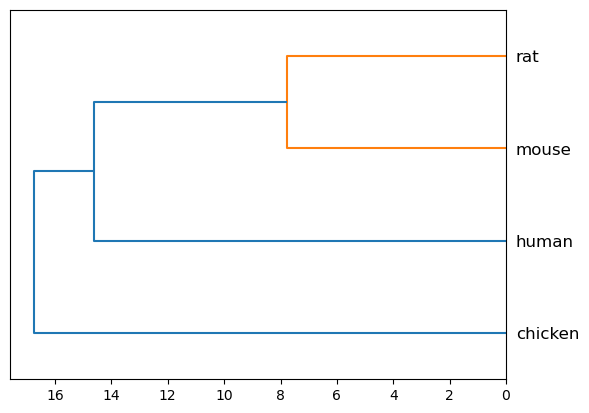

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage 

organisms = ["human","mouse","rat","chicken"]

insuline = ["MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN",
         "MALWMRFLPLLALLFLWESHPTQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGPGAGDLQTLALEVAQQKRGIVDQCCTSICSLYQLENYCN",
         "MALWIRFLPLLALLILWEPRPAQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGPGAGDLQTLALEVARQKRGIVDQCCTSICSLYQLENYCN",
         "MALWIRSLPLLALLVFSGPGTSYAAANQHLCGSHLVEALYLVCGERGFFYSPKARRDVEQPLVSSPLRGEAGVLPFQQEEYEKVKRGIVEQCCHNTCSLYQLENYCN"]

X = mermatrix(insuline) #Distance matrix 
dist = linkage(X, method="average")  #average = UPGMA method

#fig = plt.figure(figsize=(10, 20))
dn = dendrogram(dist, labels = organisms, orientation = "left")
plt.show()

<h4> Exercise10: Define a function $LZMatrix$ that takes a list of sequences and returns a matrix of distances between them (see Lecture 2, $words\_comparison$ function). Use this matrix to generate a phylogenetic tree for insuline sequences.

In [53]:
# exercise 10

def WordSeq(seq):
    d=[]
    l=len(seq)
    i=0
    k=1
    n=0
    while i<l:
        while seq[i:i+k] in d and i+k<l:#Everytime the word is already in the list, k+=1 -> the function check with the next letter
            k+=1
        if seq[i:i+k] not in d:     
            d.append(seq[i:i+k])  #When the word isn't in d, the loop stops and the word is put into the list
        i+=k  #i becomes i+k to start to read again after the words that was already added
        k=1#we set again the value of k to 1 so that when the loops start again it start to check if the next letter is in the list    
    return d

def words_comparison(seq1, seq2):
    l1 = len(WordSeq(seq1))
    l2 = len(WordSeq(seq2))
    l3 = len(WordSeq(seq1+seq2))
    C = (l3 - min(l1,l2))/max(l1,l2)
    return C

def lzmatrix(sequences):
    size = len(sequences)
    matrix = np.empty([size, size])
    for i in range(size):
        for j in range(size):
            seq1 = sequences[i]
            seq2 = sequences[j]
            distance = words_comparison(seq1, seq2)

            matrix[i][j] = distance
    return matrix

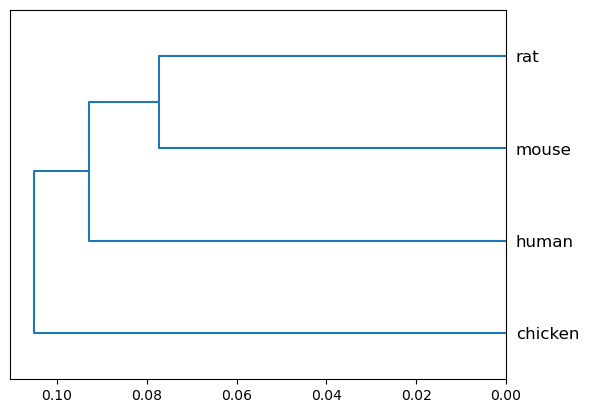

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage 

organisms = ["human","mouse","rat","chicken"]

insuline = ["MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN",
         "MALWMRFLPLLALLFLWESHPTQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGPGAGDLQTLALEVAQQKRGIVDQCCTSICSLYQLENYCN",
         "MALWIRFLPLLALLILWEPRPAQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGPGAGDLQTLALEVARQKRGIVDQCCTSICSLYQLENYCN",
         "MALWIRSLPLLALLVFSGPGTSYAAANQHLCGSHLVEALYLVCGERGFFYSPKARRDVEQPLVSSPLRGEAGVLPFQQEEYEKVKRGIVEQCCHNTCSLYQLENYCN"]

X = lzmatrix(insuline) #Distance matrix 
dist = linkage(X, method="average")  #average = UPGMA method

#fig = plt.figure(figsize=(10, 20))
dn = dendrogram(dist, labels = organisms, orientation = "left")
plt.show()